There are many data preprocessing techniques:

1. Data Cleaning;
  
  1. Data imputation
  2. Feature Scaling


2. Feature Transformation:
  1. Polynomial Features
  2. Discretization
  3. Handling categorical features
  4. Custom Transformers
  5. Composite Transformers
    1. Transformation to diverse features
    2. TargetTransformedRegressor

3. Feature Selection
  1. Filterbased selection
  2. Wrapper based selection

4. Feature Extraction
  1. PCA

# Import Basic Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style = 'whitegrid')

# 1. Feature Extraction

## DictVectorizer

In [2]:
# many times data is present as list of dictonary objects. ML algorithms expect the data in matrix form with shape (n,m) where n is number of samples and m is number of features.
# dict object >>> feature matrix

# create a sample data

data = [{'age':4, 'ht':96.0},
        {'age':5, 'ht':97.0},
        {'age':6, 'ht':98.0},
        {'age':7, 'ht':99.0},]

In [3]:
# convert this to feature matrix

# import dictvectorizer
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse = False)
data_transformed = dv.fit_transform(data)

data_transformed

array([[ 4., 96.],
       [ 5., 97.],
       [ 6., 98.],
       [ 7., 99.]])

In [4]:
# shape : samples : 4 and with features = 2

data_transformed.shape

(4, 2)

# 2. Data Imputation

Many ML algorithms need full feature matrix and they may not work in presence of missing data

In [5]:
# import imputer
from sklearn.impute import SimpleImputer

In [6]:
SimpleImputer?

In [7]:
# data imputation on real world dataset;

cols = ['age','sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None, names = cols)

In [8]:
# check if there are any missing values
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
# lets check if there are missing values in numerical columns

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
# lets check for non-numerical featuers- i.e. ca and thal

heart_data.ca.unique()


array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [11]:
heart_data.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [12]:
# presence of ? indicates there are some missing values

In [13]:
print('#missing values in ca:',
      heart_data.loc[heart_data.ca=='?','ca'].count())

print('#missing values in thal:',
      heart_data.loc[heart_data.thal=='?','thal'].count())

#missing values in ca: 4
#missing values in thal: 2


In [14]:
# now we repalce ? with nan

heart_data.replace('?', np.nan, inplace = True)

In [15]:
# now we fill the missing value with sklearn imputation utilities

# add_indicator = False : Default choice that only imputes the missing values

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


In [16]:
# add_indicator = True: Adds additional column for each column containing missing values. In our case this adds two columns one for ca and other for thal. It indicates the sample has missing value

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',
                        add_indicator = True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)


(303, 16)


# 3. Feature scaling

In [17]:
# lets get the data

cols = ['sex','length','Diameter','height','whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header= None, names = cols)

In [18]:
# Step 1: Examine the dataset

# Feature scaling can only be performed on the numerical attributes with info() method.

abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [19]:
# Step 1a: convert non-numerical attributes to numerical attributes:

abalone_data.sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [20]:
abalone_data = abalone_data.replace({'sex': {"M":1,
                                             "F":2,
                                             "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [21]:
# Step 2 Seperate the labels from the features:

y = abalone_data.pop('Rings')
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [22]:
# Step3: Examine feature scales:

abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


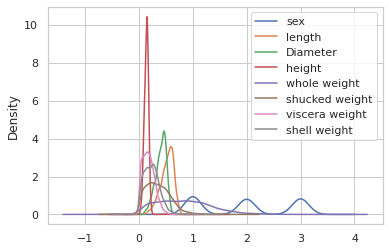

In [23]:
# we can generate KDE Plot using Gaussian Kernel

# in statistics KDE is non-parametric way to estimate the PDF of a random variable

ax = abalone_data.plot.kde()

# observe that features have different scales

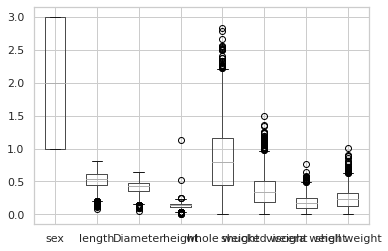

In [24]:
abalone_data.boxplot(column = ['sex','length','Diameter','height','whole weight', 'shucked weight', 'viscera weight', 'shell weight'])

In [25]:
# Step 4: Scaling

from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(abalone_data)
print(x_new)

[[0.33333333 0.55828221 0.56153846 ... 0.15087366 0.13289474 0.14925373]
 [0.33333333 0.42944785 0.40769231 ... 0.06686828 0.06381579 0.06965174]
 [0.66666667 0.65030675 0.64615385 ... 0.17237903 0.18618421 0.20895522]
 ...
 [0.33333333 0.73619632 0.73076923 ... 0.3531586  0.37828947 0.30646766]
 [0.66666667 0.76687117 0.74615385 ... 0.35685484 0.34342105 0.29452736]
 [0.33333333 0.87116564 0.85384615 ... 0.63541667 0.49539474 0.49253731]]


In [26]:
x_df = pd.DataFrame(data = x_new, columns = ['sex','length','Diameter','height','whole weight', 'shucked weight', 'viscera weight', 'shell weight']
)
x_df

,sex,length,Diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,0.333333,0.558282,0.561538,0.084071,0.181915,0.150874,0.132895,0.149254
1,0.333333,0.429448,0.407692,0.079646,0.079809,0.066868,0.063816,0.069652
2,0.666667,0.650307,0.646154,0.119469,0.239604,0.172379,0.186184,0.208955
3,0.333333,0.539877,0.561538,0.110619,0.182623,0.144825,0.150000,0.154229
4,1.000000,0.404908,0.392308,0.070796,0.072554,0.060148,0.051974,0.054726
...,...,...,...,...,...,...,...,...
4172,0.666667,0.693252,0.692308,0.146018,0.313927,0.248656,0.314474,0.247761
4173,0.333333,0.723926,0.676923,0.119469,0.341886,0.295027,0.282237,0.259204
4174,0.333333,0.736196,0.730769,0.181416,0.416210,0.353159,0.378289,0.306468
4175,0.666667,0.766871,0.746154,0.132743,0.387365,0.356855,0.343421,0.294527


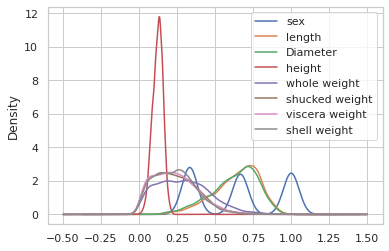

In [27]:
at = x_df.plot.kde()


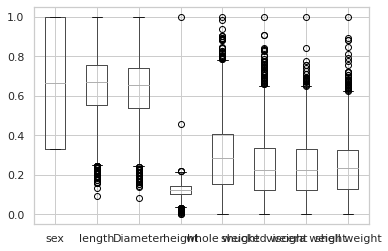

In [28]:
x_df.boxplot(column = ['sex','length','Diameter','height','whole weight', 'shucked weight', 'viscera weight', 'shell weight'])

In [29]:
# entire range is such that its 0 to 1

# there are other methods as well MinMaxScaler and Standardizer

# 4. Dummy Feature

`add_dummy_feature` augments the dataset with extra column vector with value 1s. useful to add bias term in the model

In [30]:
x = np.array([
    [7,1],
    [5,6],
    [8,9]
])

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 5. 6.]
 [1. 8. 9.]]


# 5. Custom Transformers

In [31]:
# Enables conversion of an existing Python Functions into a transformer to assist in data cleaning or processing
'''
Useful when:

1. The dataset consists of heterogenous data
2. dataset is stored in pandas dataframe and different columns need different processing pipelines
3. we need stateless transformations such as taking log of frequencies or custom scaling etc
'''

from sklearn.preprocessing import FunctionTransformer

In [32]:
# lets implement a function transformer that applies log transformation to features

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [34]:
# lets use np.log1p which returns log(1 + feature value)

transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns= wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


# Polynomial Features

In [35]:
from sklearn.preprocessing import PolynomialFeatures
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
wine_data_copy = wine_data.copy()

wine_data = wine_data.drop(['quality'], axis = 1)
wine_data.shape

#shape before transformation

(1599, 11)

In [36]:
# shape after transformation

poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
poly_wine_data.shape

(1599, 78)

In [37]:
# get all the feature names
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

#7. Discretization

Discretization is also called as quantization or binning provides a way to partition continuous data into discrete data

In [38]:
# KBinDiscretizer discretizes features into k bins

from sklearn.preprocessing import KBinsDiscretizer

In [39]:
wine_data = wine_data_copy.copy()

# transform the dataset with KBinDiscretizer

enc = KBinsDiscretizer(n_bins = 10, encode = "onehot")
x = np.array(wine_data['chlorides']).reshape(-1,1)
x_binned = enc.fit_transform(x)

In [40]:
x_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [41]:
# since output is sparsed use toarray() to expand it:

x_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# 8. Handling Categorical Features

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [43]:
# We will use iris dataset for demostration:

cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header= None, names = cols)
iris_data.head(5)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
# lets use onehotencoder

onehotencoder = OneHotEncoder(categories = 'auto')

'''
passing id arrays as data to onehotencoder is deprecated in version hence reshape (-1,1) to have 2 dimensions
Input of onehotencoder fit_transform must not be 1 rank array
'''

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))

iris_labels.shape

(150, 3)

In [46]:
iris_labels.toarray()[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [47]:
# using the ordinal encoder

enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1))
print("unique labels", np.unique(iris_labels_transformed))

iris_labels_transformed[:5]

unique labels [0. 1. 2.]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

###  OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.

### That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,)

In [48]:
## multilabel binarizer in case there are multiple values assosiated with each column

## using dummy variables

In [49]:
# using dummy variable to create one hot encoding for each unique categorical value in the 'class' column
# convert categorical class variable to one hot encoding

iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])

'''
OneHotEncoder cannot process string values directly. If your nominal features are strings, then you need to first map them into integers.

pandas.get_dummies is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified.
'''

iris_data_onehot


,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


# 9. Composite Transformersx

In [50]:
x= [[20,'male',],
    [19,'female',],
    [22,'male',],
    [30,'male',],
    [50,'female',],]

# import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler', MaxAbsScaler(),[0]),
                        ('pass', 'passthrough',[0]),
                        ('encoder', OneHotEncoder(), [1])])

ct.fit_transform(x)

array([[0.4, 20, 0.0, 1.0],
       [0.38, 19, 1.0, 0.0],
       [0.44, 22, 0.0, 1.0],
       [0.6, 30, 0.0, 1.0],
       [1.0, 50, 1.0, 0.0]], dtype=object)

# transformed Target Regressor

transforms the target variable y before fitting the regression model

In [51]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y = True)
X, y = X[:2000, :], y[:2000] # select only a subset of data

transformer = MaxAbsScaler()

regressor = LinearRegression()

regr = TransformedTargetRegressor(regressor = regressor, transformer = transformer)
# score of raw regressor
X_train, X_test , y_train, y_test = train_test_split(X,y, random_state = 0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.5852954114112681

In [52]:
# score of transformed label regressor
raw_target_regr = LinearRegression().fit(X_train, y_train)
raw_target_regr.score(X_test, y_test)

0.5852954114112681

# 6. Feature Selection

`sklearn.feature_selection` module has useful API to select features/ reduce dimensionality either to improve estimator's accuracy scores or to boost their performance on very high-dimensional datasets. 

In [53]:
# import

from sklearn.feature_selection import VarianceThreshold

In [54]:
data = [
    {'age':4,'height':96.0},
    {'age':1,'height':72.0},
    {'age':3,'height':88.0},
    {'age':2,'height':81.0},
]

dv = DictVectorizer(sparse = False)
data_transformed= dv.fit_transform(data)
np.var(data_transformed, axis = 0)

array([ 1.25  , 78.1875])

In [55]:
# variance threshold

vt = VarianceThreshold(threshold =9)
data_new = vt.fit_transform(data_transformed)
data_new


array([[96.],
       [72.],
       [88.],
       [81.]])

## SelectKBest

In [56]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# download data
x_california, y_california = fetch_california_housing(return_X_y = True)

# select a subset of data
X,y = x_california[:2000, :], y_california[:2000]

print(X.shape)

(2000, 8)


In [57]:
# lets select 3 most important features as its a regression problem
# we can use mutual_info_regression or f_regression scoring functions only

skb = SelectKBest(mutual_info_regression, k = 3)
X_new = skb.fit_transform(X,y)
print(X_new.shape)

(2000, 3)


In [58]:
# get the feature names

skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

In [59]:
# SelectPercentile

from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile = 30)
X_new = sp.fit_transform(X,y)
print(X_new.shape)

(2000, 3)


In [60]:
sp.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

## Generic Univariate Select

It applies uivariate feature selection with certain strategy , which is passed to API via mode parameter. The mode can take one of the following values: `percentile`, `k_best`, `fpr`: false positive rate, `fdr`: false discovery rate, `fwe`: family wise error

In [61]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode = 'k_best', param = 3)
X_new = gus.fit_transform(X,y)

# shape before feature selection
X.shape

(2000, 8)

In [62]:
# shape after the feature selection

X_new.shape

(2000, 3)

## Wrapper based methods

In [63]:
# RFE: Recursive Feature elimination

#step 1: fits the model
# step 2: Ranks the features and then removes one or more features (depending upon step parameters)

In [64]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3, step =1)
selector = selector.fit(X,y)

# support attribute is a boolean array
# marks which features are selected

selector.support_

array([ True, False, False, False, False, False,  True,  True])

In [65]:
# how are features ranked:
# if rank is 1 then its selected else with rank 2 or more are ranked least

selector.ranking_

array([1, 5, 4, 3, 6, 2, 1, 1])

In [66]:
# tansformation
X_new = selector.transform(X)
X_new.shape

(2000, 3)

In [67]:
# RFE-CV is same as RFE except that it adds one more layer of CV to RFE

In [68]:
# selectfrom model

from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X,y)

print('the coefficient of features, ', estimator.coef_)

the coefficient of features,  [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]


In [69]:
print('coefficient of top 3 featuers, ', np.argsort(estimator.coef_)[-3:])

coefficient of top 3 featuers,  [1 2 0]


In [70]:
model = SelectFromModel(estimator, max_features = 3, prefit = True)
x_new = model.transform(X)
x_new.shape

(2000, 3)

In [71]:
# Sequential Feature Selection

from sklearn.feature_selection import SequentialFeatureSelector


In [72]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select = 3)
sfs.fit_transform(X,y)

print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 189 ms, sys: 25.9 ms, total: 215 ms
Wall time: 215 ms


In [73]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select = 3, direction = 'backward')
sfs.fit_transform(X,y)

print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 360 ms, sys: 187 ms, total: 547 ms
Wall time: 361 ms


In [74]:
# Both Backward and Forward mode selects same features

#11. PCA

here feature selection is called Feature reduction. 

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [76]:
# principal components
pca.n_components_

2

In [77]:
# principal axes
pca.components_

array([[ 3.58746278e-04, -5.26626273e-03, -3.55739438e-04,
        -1.04636644e-04,  9.99985993e-01,  1.07189337e-04,
        -3.72926795e-05, -3.18638902e-05],
       [ 2.83042309e-02, -9.96787172e-01,  7.04618553e-02,
         1.11176863e-02, -5.23215008e-03, -1.02817045e-03,
         1.45200590e-02,  1.69252465e-02]])

In [78]:
# explained varaince corresponding to each principal axee

pca.explained_variance_

array([9.32990794e+05, 1.72499472e+02])

In [81]:
# Mean across dimensions:

pca.mean_

array([ 3.88541705e+00,  3.13105000e+01,  5.89404425e+00,  1.15137723e+00,
        1.24335450e+03,  2.72214812e+00,  3.80665650e+01, -1.21940045e+02])

In [80]:
# draw the projections on different vectors
projections = X@pca.components_
print(projections.shape)

arbitrary_projections = X@c3
arbitrary_projections.shape 

ValueError: ignored

In [ ]:
# reducing dimensions:

pca = PCA(n_components = 1)
pca.fit(X)
x_pca = pca.transform(X)

# this part is covered in other notebook with visualisation


# 12. Chaining Transformers

The preprocesssing transformations are applied one after another on the input feature matrix

It is important to apply exactly same transformations on training, evaluation, and test set in same order.

failing to do so will lead to incorrect predictions from the model due to distribution shift and hence incorrect performance evaluation


In [82]:
# sklearn.pipeline module: sequentially apply list of transformers and estimators

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
estimators = [
    ('simple imputer', SimpleImputer()),
    ('standard Scaler', StandardScaler())
]
pipe = Pipeline(steps = estimators)


Intermediate steps of the pipeline must be transformers that is they must implement fit and transform method. The final estimator needs to implement only fit.

In [83]:
# same can be created using make_pipeline

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(), StandardScaler())

In [84]:
# accessing individual steps in the pipeline:

from sklearn.decomposition import PCA
estimators = [('SimpleImputer', SimpleImputer()),
              ('pca', PCA()),
              ('regressor', LinearRegression())]

pipe = Pipeline(steps = estimators)

In [85]:
# number of steps in pipeline:

len(pipe.steps)

3

In [86]:
pipe.steps

[('SimpleImputer', SimpleImputer()),
 ('pca', PCA()),
 ('regressor', LinearRegression())]

In [87]:
# access the second step:

pipe.named_steps.pca

PCA()

In [89]:
pipe.steps[1]

('pca', PCA())

In [90]:
pipe[1]

PCA()

In [91]:
pipe['pca']

PCA()

In [94]:
# accessing parameter of steps in pipeline:

estimators = [('SimpleImputer', SimpleImputer()),
              ('pca', PCA()),
              ('regressor', LinearRegression())]

pipe = Pipeline(steps = estimators)

# this is set after the pipeline is created
pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('SimpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In [96]:
# Gridsearch with pipeline

from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer = ['passthrough',
                             SimpleImputer(),
                             KNNImputer()], clf = [SVC(), LogisticRegression()], clf_C = [0.1,10,100])

grid_search = GridSearchCV(pipe, param_grid = param_grid)

# c is inverse of regularization. Smaller its value stronger the regularisation is. 

# in above example clf_C provides set of values for regularization

In [98]:
# Caching Transformers:

'''
Transforming data is an expensive step.

for grid-search, transformers need not to be applied for every parameter configuration. They can be applied only once and transformed data can be reused.

this can be achieved using memory parameter of pipeline object
'''

import tempfile
tempDirPath = tempfile.TemporaryDirectory()

estimators = [('Simple Imputer', SimpleImputer()),
              ('pca', PCA()),
              ('regressor', LinearRegression())]

pipe = Pipeline(steps = estimators, memory = tempDirPath)

In [99]:
# Feature Union

'''
It applies list of transformer objects in parallel. and their output are concatenated side-by-side into larger matrix
`Feature Union` and `Pipeline` can be used to create complex transformers
'''



'\nIt applies list of transformer objects in parallel. and their output are concatenated side-by-side into larger matrix\n`Feature Union` and `Pipeline` can be used to create complex transformers\n'

# 13. Visualizing Pipeline

In [100]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [103]:
num_pipeline = Pipeline([
    ('selector', ColumnTransformer([('select_first_4', 'passthrough', slice(0,4))])),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())])

cat_pipeline = ColumnTransformer([('label binarizer', LabelBinarizer(), [4]),])

full_pipline = FeatureUnion(transformer_list = [('num_pipeline', num_pipeline),
                                                ('cat_pipeline', cat_pipeline)])

In [105]:
from sklearn import set_config
set_config(display = 'diagram')
# displays html representation in jupyter context
full_pipline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label '
                                                                 'binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

# 14. Handling Imbalanced Data

Imbalanced data are those where one class in very less represented than other. this kind of data results in less efficient ML algorithms.

Two main approaches to handle the imbalanced data:

1. Undersampling
2. Oversampling

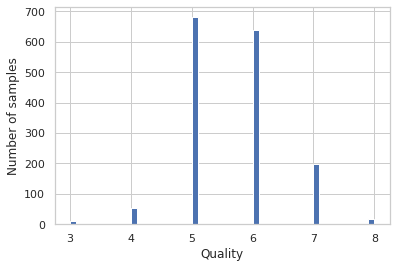

In [106]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_data.head(5)

# display the histogram of target variable quality

wine_data['quality'].hist(bins = 50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [108]:
wine_data.shape

(1599, 12)

## undersampling

In [109]:
# undersampling means sampling from majority class so that to keep only a part of these data points

# it may be carried out using RandomUnderSampler class from imblearn library

from imblearn.under_sampling import RandomUnderSampler

In [110]:
# class_count

class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

In [112]:
# seperate class:

class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]

In [113]:
# print shape of class
class_3.shape

(10, 12)

In [114]:
class_4.shape

(53, 12)

In [115]:
class_5.shape

(681, 12)

In [116]:
class_6.shape

(638, 12)

In [117]:
class_7.shape

(199, 12)

In [119]:
from collections import Counter # it allows to count the items in iterable list

X = wine_data.drop(['quality'],axis = 1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state = 0)
X_rus , y_rus = undersample.fit_resample(X,y)

print(Counter(y)) # original datser
print(Counter(y_rus)) # resample dataset. selected 10 examples for each class

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


## Oversampling

In [121]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler()
X_ros, y_ros = rus.fit_resample(X,y)

print(Counter(y))
print(Counter(y_ros)) # oversampled: 681 in each class now.

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [123]:
# oversampling using SMOTE: Synthetic minority oversampling technique

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X,y)
counter = Counter(y_sm)
counter # 681 for each class

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [124]:
'''
Types of SMOTE:

1. Borderline SMOTE
2. Borderline SMOTE SVM
3. Adaptive Synthetic Sampling ADASYN
'''

'\nTypes of SMOTE:\n\n1. Borderline SMOTE\n2. Borderline SMOTE SVM\n3. Adaptive Synthetic Sampling ADASYN\n'